In [8]:
import json
import pandas as pd
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
from torch import nn 
import os
os.getcwd()

'c:\\Users\\dfels\\OneDrive\\Dokumenter\\vae_lung_tumor_segmentation\\notebooks'

In [9]:
path = '../raw_data/lung/dataset.json'
with open(path) as f:
    data_set = json.load(f)
data_paths = data_set['training']
nii_img = nib.load('../raw_data/lung' + data_paths[0]['image'])
nii_data = nii_img.get_fdata()

In [10]:
nii_data = np.transpose(nii_data, [2, 0, 1])
nii_data.shape

(252, 512, 512)

In [11]:
a = nii_data - nii_data.min()
a /= a.max()

resize = T.Resize(size=(256, 256))
a = torch.from_numpy(a)
b = resize(a)

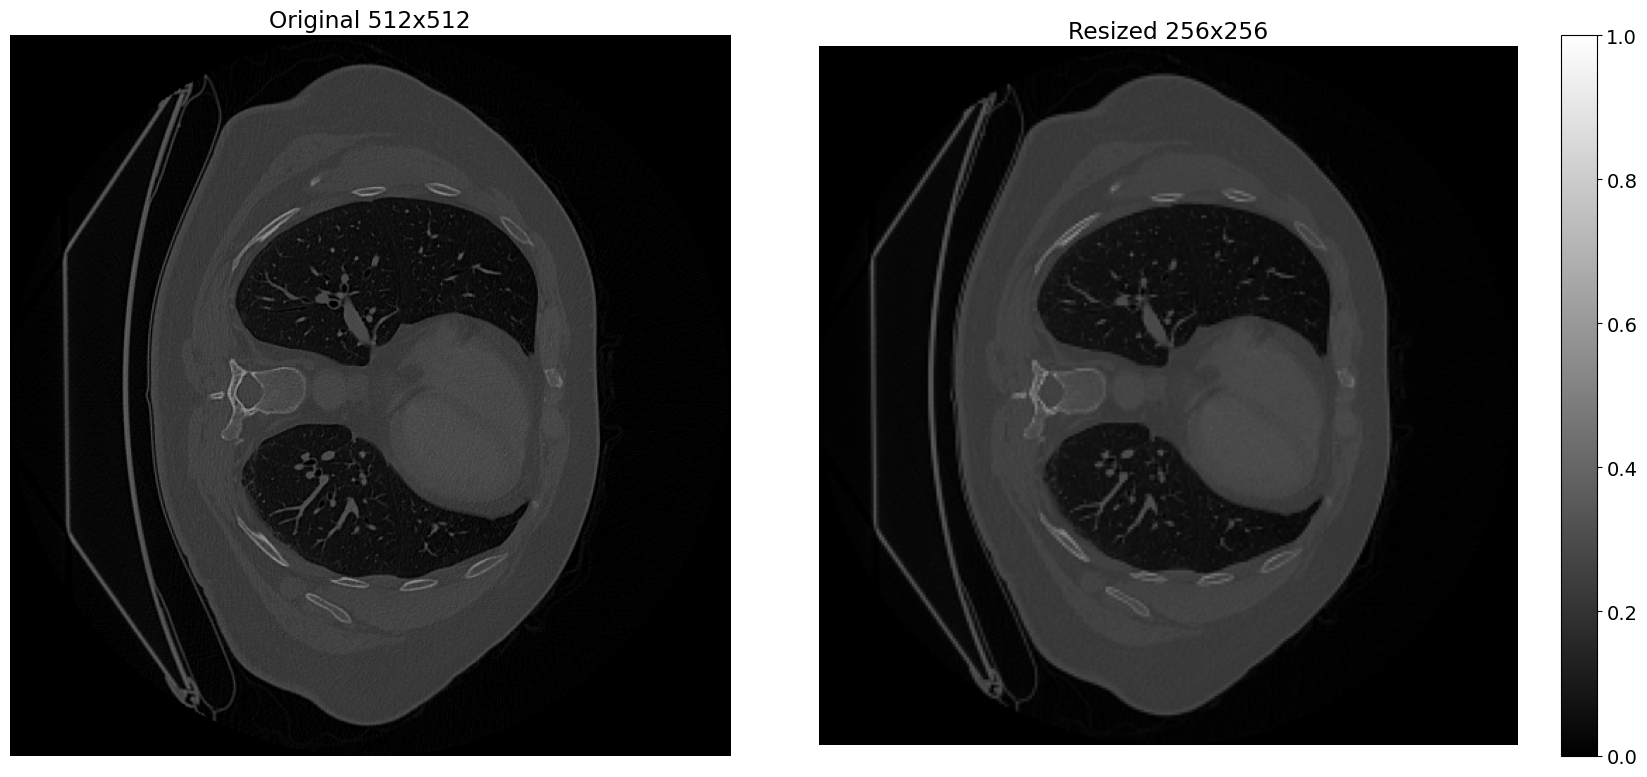

In [13]:
#plt.rcParams["figure.figsize"] = [10, 3]
#plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
im = axs[0].imshow(a[100], vmin=0, vmax=1, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original 512x512')
im2 = axs[1].imshow(b[100], vmin=0, vmax=1, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Resized 256x256')
fig.colorbar(im2, ax=axs[1], shrink=1, location='right')
fig.tight_layout()
plt.savefig("../figures/data_sample.svg")

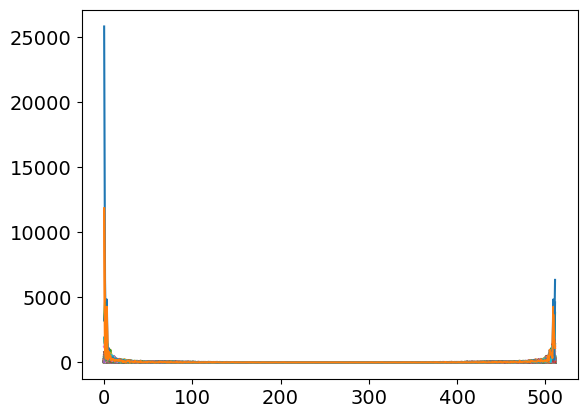

In [58]:
A = abs(torch.fft.fft2(a[100])).numpy()
B = abs(torch.fft.fft2(b[100])).numpy()
plt.plot(A[:, :]);

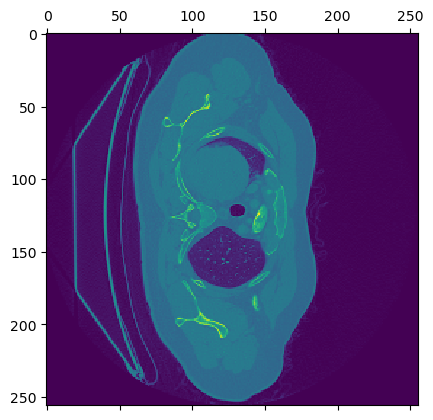

In [ ]:
import torch.nn.functional as F
a_pooled = F.avg_pool2d(a, 2, (2, 2))
plt.matshow(a_pooled.numpy()[200])

In [ ]:
nii_img_label = nib.load(data_paths[0]['label'])
nii_data_label = nii_img_label.get_fdata()
nii_data_label = np.transpose(nii_data_label, [2, 0, 1])
nii_data_label = np.ma.masked_where(nii_data_label < 1.0, nii_data_label) 
nii_data_label.shape

(252, 512, 512)

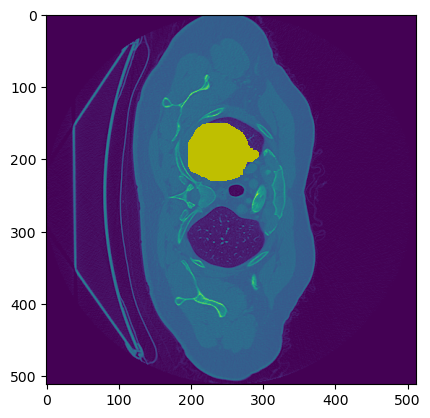

In [ ]:
from matplotlib.colors import ListedColormap
plt.imshow(a[200])
cmap = ListedColormap(['y'])
plt.imshow(nii_data_label[200], cmap=cmap)
plt.show()